In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# 트립 정보 불러오기
overview = pd.read_excel('./MeasurementData/Overview.xlsx')
overview = overview.rename(columns={'Unnamed: 8': 'Used Battery'})
overview = overview.dropna(subset=['Trip'])
# overview = overview.drop('Unnamed: 13', axis = 1)

## DF 생성

In [164]:
# 필요한 정보만 선택하기
pickview = overview.loc[:,['Trip', 'Date', 'Route/Area', 'Weather']]
trip_list = list(pickview.Trip) # 개별 데이터 목록

# 데이터프레임 생성
df = pd.DataFrame()
num = 0

def reader(name):
    global df, num
    now = name
    # 파일 읽어오기
    name = pd.read_csv(f'./MeasurementData/{name}.csv', encoding='cp1252', sep=';')
    name = name.drop(['displayed SoC [%]', 'min. SoC [%]', 'max. SoC [%)'], axis=1)
    # print(name.shape)
    
    # 배터리 소모량 계산하기
    name = name.assign(usage=name['SoC [%]'] - name['SoC [%]'].shift(-600)) # 1분
    name = name.dropna(subset=['usage'])
    # plt.plot(name.usage)

    name = name.assign(Trip = str(now), 
                       Date = pickview.Date.iloc[num],
                       Route_Area = pickview['Route/Area'].iloc[num],
                       Weather = pickview.Weather.iloc[num])
    num += 1

    # df에 추가
    df = pd.concat([df, name])

    # 진행도 표시
    # print(now)

for i in trip_list:
    reader(i)

df = df.iloc[:, :30]
print(df.shape)

(1022000, 30)


In [165]:
# 인덱스 재부여
df = df.reset_index(drop = True)
# 이상치 제거
df[df.usage > 20] = 5

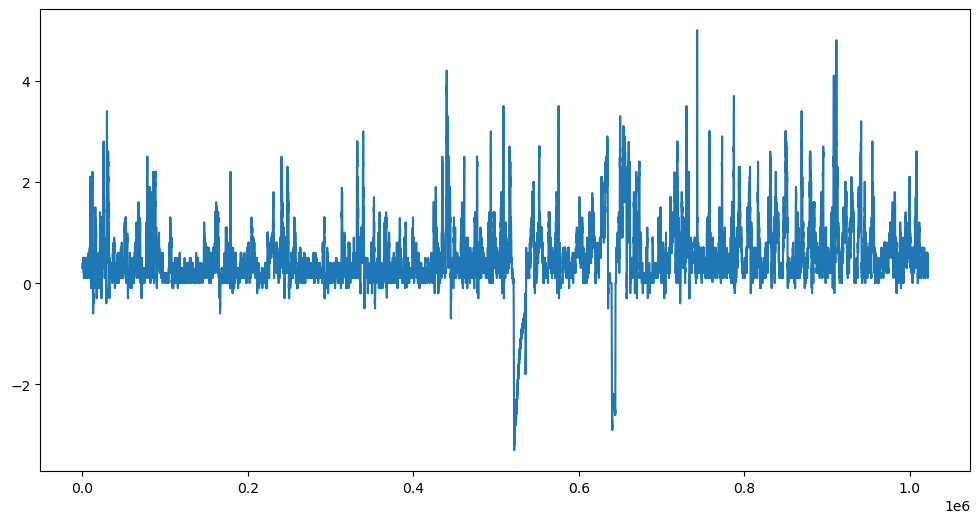

In [166]:
# 간단한 시각화
plt.figure(figsize = (12, 6))
plt.plot(df.usage)

이 코드는 실행하지 않습니다

데이터 손실이 일어났기 때문입니다

In [161]:
# 데이터 경량화
# df[['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
#        'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
#        'Regenerative Braking Signal ', 'Battery Voltage [V]',
#        'Battery Current [A]', 'Battery Temperature [°C]',
#        'max. Battery Temperature [°C]', 'SoC [%]', 'Heating Power CAN [kW]',
#        'Heating Power LIN [W]', 'Requested Heating Power [W]',
#        'AirCon Power [kW]', 'Heater Voltage [V]',
#        'Heater Current [A]', 'Ambient Temperature [°C]',
#        'Coolant Temperature Heatercore [°C]',
#        'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]',
#        'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]',
#        'usage']] = df[['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
#        'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
#        'Regenerative Braking Signal ', 'Battery Voltage [V]',
#        'Battery Current [A]', 'Battery Temperature [°C]',
#        'max. Battery Temperature [°C]', 'SoC [%]', 'Heating Power CAN [kW]',
#        'Heating Power LIN [W]', 'Requested Heating Power [W]',
#        'AirCon Power [kW]', 'Heater Voltage [V]',
#        'Heater Current [A]', 'Ambient Temperature [°C]',
#        'Coolant Temperature Heatercore [°C]',
#        'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]',
#        'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]',
#        'usage']].astype('float16')

In [167]:
df_save = df

In [190]:
df = df_save

In [191]:
# Na 값 확인
df.isna().sum()

# Velocity의 Na값
df.dropna(subset=['Velocity [km/h]'], inplace=True)
# 데이터를 살펴보니 속도가 NA값인 경우도 쓰로틀(엑셀)을 밟고 있고 토크도 유지되는 것으로 보아 속도가 0이 아닌 것으로 추정됨
# 따라서 정확한 속도를 알 수 없고, 1.5만이라는 적은 수의 표본이므로 Na값이 있는 행을 삭제

# 나머지는 열을 버립시다
df = df.dropna(axis=1)

In [192]:
# Na 값 확인
df.isna().sum()

Time [s]                             0
Velocity [km/h]                      0
Elevation [m]                        0
Throttle [%]                         0
Motor Torque [Nm]                    0
Longitudinal Acceleration [m/s^2]    0
Regenerative Braking Signal          0
Battery Voltage [V]                  0
Battery Current [A]                  0
Battery Temperature [°C]             0
max. Battery Temperature [°C]        0
SoC [%]                              0
Heating Power CAN [kW]               0
Requested Heating Power [W]          0
AirCon Power [kW]                    0
Heater Signal                        0
Ambient Temperature [°C]             0
Heat Exchanger Temperature [°C]      0
Cabin Temperature Sensor [°C]        0
usage                                0
Trip                                 0
Date                                 0
Route_Area                           0
Weather                              0
dtype: int64

In [193]:
# 날짜 열을 날짜 형식으로 바꿉니다
df['Date'] = pd.to_datetime(df['Date'].str.replace('_', '-'), format='%Y-%m-%d-%H-%M-%S')

C:\Users\HOME\AppData\Local\Temp\ipykernel_20800\3681466716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'].str.replace('_', '-'), format='%Y-%m-%d-%H-%M-%S')


In [194]:
# df 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006171 entries, 0 to 1006170
Data columns (total 24 columns):
 #   Column                             Non-Null Count    Dtype         
---  ------                             --------------    -----         
 0   Time [s]                           1006171 non-null  float64       
 1   Velocity [km/h]                    1006171 non-null  float64       
 2   Elevation [m]                      1006171 non-null  float64       
 3   Throttle [%]                       1006171 non-null  float64       
 4   Motor Torque [Nm]                  1006171 non-null  float64       
 5   Longitudinal Acceleration [m/s^2]  1006171 non-null  float64       
 6   Regenerative Braking Signal        1006171 non-null  float64       
 7   Battery Voltage [V]                1006171 non-null  float64       
 8   Battery Current [A]                1006171 non-null  float64       
 9   Battery Temperature [°C]           1006171 non-null  float64       
 10  max. B

In [195]:
df

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,AirCon Power [kW],Heater Signal,Ambient Temperature [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C],usage,Trip,Date,Route_Area,Weather
0,0.0,0.00,574.0,0.00,0.00,-0.03,0.0,391.40,-2.20,21.0,...,0.4,1,25.5,30.5,24.5,0.3,TripA01,2019-06-25 13:21:14,Munich East,sunny
1,0.1,0.00,574.0,0.00,0.00,0.00,0.0,391.40,-2.21,21.0,...,0.4,1,25.5,30.5,24.5,0.3,TripA01,2019-06-25 13:21:14,Munich East,sunny
2,0.2,0.00,574.0,0.00,0.00,-0.01,0.0,391.40,-2.26,21.0,...,0.4,1,25.5,30.5,24.5,0.3,TripA01,2019-06-25 13:21:14,Munich East,sunny
3,0.3,0.00,574.0,0.00,0.00,-0.03,0.0,391.40,-2.30,21.0,...,0.4,1,25.5,30.5,24.5,0.3,TripA01,2019-06-25 13:21:14,Munich East,sunny
4,0.4,0.00,574.0,0.00,0.00,-0.03,0.0,391.40,-2.30,21.0,...,0.4,1,25.5,30.5,24.5,0.3,TripA01,2019-06-25 13:21:14,Munich East,sunny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006166,1356.7,26.12,574.0,34.93,2.50,-0.17,0.0,380.13,-9.34,10.0,...,0.0,1,-3.5,46.5,24.0,0.3,TripB37,2020-01-21 09:15:20,Munich East,slightly cloudy
1006167,1356.8,26.03,574.0,36.18,4.77,-0.04,0.0,379.93,-11.69,10.0,...,0.0,1,-3.5,46.5,24.0,0.3,TripB37,2020-01-21 09:15:20,Munich East,slightly cloudy
1006168,1356.9,25.93,574.0,37.27,8.92,-0.01,0.0,379.82,-11.65,10.0,...,0.0,1,-3.5,46.5,24.0,0.3,TripB37,2020-01-21 09:15:20,Munich East,slightly cloudy
1006169,1357.0,25.92,574.0,38.45,7.08,-0.01,0.0,379.72,-11.10,10.0,...,0.0,1,-3.5,46.5,24.0,0.3,TripB37,2020-01-21 09:15:20,Munich East,slightly cloudy


In [196]:
# df 파일 내보내기
df.to_csv('./DF.csv', index=False)